
# <font color=navy> 7. Loss Funtions


> 어느 기상학자가 허리케인이	그가	사는	도시를	덮칠	확률을	예측하고	있다.	그는	95%	신뢰수준으로	허리케인이	
도시를	덮치지	않을	확률이	99~100%	사이라고	추정한다.	기상학자는	자신의	정확도에	매우	만족하며	재난	대피는	필요	없다고	시청에	권고하였다.	그러나	불행히도	허리케인은	도시를	덮쳤고,	도시는	물에	잠겼다.


> **"정확하게 틀리는 것보다 대강 맞는 것이 더 낫다."**

## 7.1 손실함수 - Loss Functions

- True parameter인 $\theta$와 그것의 추정치인 $\hat \theta$의 함수로 추정치가 얼마나 나쁜지를 측정하는 함수

$$
L(\theta, \hat{\theta} ) = f(\theta, \hat{\theta})
$$

#### Squared-error loss

$$
L\left(\theta, \hat{\theta}\right) = \left( \theta - \hat{\theta} \right)^{2}
$$

#### Asymmetric squared-error loss 

$$
L\left(\theta, \hat{\theta} \right)=\begin{cases} \left(\theta - \hat{\theta} \right)^{2} \quad \hat{\theta} < \theta \\ c\left( \theta - \hat{\theta} \right)^{2} \quad \hat{\theta} \ge \theta, 0<c<1  \end{cases}
$$

- 진짜 모수보다 큰 값을 추정하는 것이 작은 값을 추정하는 것보다 나은 경우 
- Example: 다음 달의 웹 트래픽을 추정하려는 경우, 여유있게 예상하여 남는 편이 서버 자원이 부족한 경우보다 손실이 적다.

#### Absolute-loss


$$
L \left( \theta, \hat{\theta} \right) = \left| \theta - \hat{\theta} \right|
$$

- 오차에 따라 손실이 선형적으로 증가
- Squared-error loss가 이상치를 편향되게 강조한다는 단점을 보완 
- 기계학습, 로버스트 통계에서 사용 

#### Zero-one loss
$$L(\theta, \hat{\theta}) = 1_{\hat{\theta} \neq \theta}$$


#### Log loss
$$L(\theta, \hat{\theta}) = -\hat{\theta}\log(\theta) - (1 - \hat{\theta})\log(1-\theta), \hat{\theta} \in 0,1, \theta \in [0, 1]$$

## 7.2 Bayes' risk

- 사후확률분포를 사용하여 계산된 **기대손실**(expected loss)을 Bayes' risk라고 한다.

$P(\theta | X)$ 가 데이터 $X$를 관측한 후 $\theta$의 사후확률분포라면 다음 함수는 **모수 $\theta$ 에 대해 추정치 $\hat{\theta}$를 선택하는 기대손실** 

$$
l(\hat{\theta}) = E_{\theta} \left[ L(\theta, \hat{\theta}) \right] 
$$

- Bayes' Risk가 true parameter인 $\theta$를 사용하여 표현되므로, 이를
사후확률분포에서 나온 $N$개의 표본 $\theta_i$, $i = 1, \dots , N$과 손실함수 $L$이 주어졌을 때 추정치 $\hat{\theta}$를 사용하여 근사
$$
\frac{1}{N} \sum _{ i=1 }^{ N }{ L(\theta_i, \hat{\theta}) } \approx E_{\theta} \left[ L(\theta, \hat{\theta}) \right] = l(\hat{\theta})
$$

## 7.3 Bayes estimator

- Bayes' risk를 최소화 시키는 $\hat \theta$

#### Squared error loss

$$ \underset{\hat \theta}{\arg \min} E_{\theta|X} \left[ (\theta-\hat \theta)^2 \right] = E_{\theta|X}(\theta)$$
- Posterior mean 
- Bayes' Least Square (BLS) estimator 

#### Zero-one loss

$$ \underset{\hat \theta}{\arg \min} E_{\theta|X} \left[  1_{\hat{\theta} \neq \theta}\right] = \underset{\theta} {\arg \max} p(\theta|X)$$
- Posterior mode
- Maximum a posteriori (MAP) estimator


#### Absolute-loss
$$ \underset{\hat \theta}{\arg \min} E_{\theta|X} \left[  \left| \theta - \hat{\theta} \right|\right] = \tilde \theta$$
- Posterior median

## 7.3 Example: 'The Price Is Right' 쇼케이스 최적화

<img src="https://wwwimage-secure.cbsstatic.com/thumbnails/photos/w400-q80/blog/tpir-logo-promo.jpg"> 
'The Price Is Right' 쇼의 규칙은 다음과 같다.

1. 두 참가자가 쇼케이스에서 겨루게 된다.
2. 각 참가자는 각각 다른 구성의 상품을 보게 된다.
3. 상품을 관찰한 뒤 참가자는 자신들 앞에 놓인 상품의 가격을 써낸다.
4. 써낸 가격이 실제 가격보다 높다면 그 참가자는 탈락한다.
5. 써낸 가격이 실제 가격보다 $250 이내라면 참가자는 승리하고 상품을 받는다.

두 가지 상품이 제시된 상황을 생각해보자.
1. 토론토 여행(Toronto)
2. 제설기(snowblower)

두 상품의 가격의 합을 얼마로 추측하는 것이 적당할까?

- 이전의 에피소드들에 등장한 가격들을 기록했을 때 그 가격의 분포가  정규확률분포를 따른다고 가정하고 그 평균이 35,000, 표준편차가 7500 이었다고 하자.
$$
\text{실제 가격} \sim \text{Normal}(35000, 7500^2)
$$

- 상품의 가격에 대한 우리의 믿음이 정규확률분포를 따른다고 가정 
    - 우리는 이 상품의 진짜 가격을 추측하지만, 추측에 대해 확신하지는 못한다. 이런 불확실성을 정규분포의 모수를 사용하여 표시할 수 있다. 
$$
\text{Prize}_1\text{(snowblower)} \sim \text{Normal}(3000, 500^2)
$$
$$
\text{Prize}_2\text{(Toronto)} \sim \text{Normal}(12000, 3000^2)
$$
    - 토론토 여행의 진짜 가격이 12,000 달러라고 믿고 있다고 하고, $[9000, 15000]$사이에 있을 확률이 68.2%라고 해보자.
    
- 실제 가격을 $\text{Prize}_1 + \text{Prize}_2 + \epsilon$으로 가정
    -  $\epsilon$은 error term



In [1]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

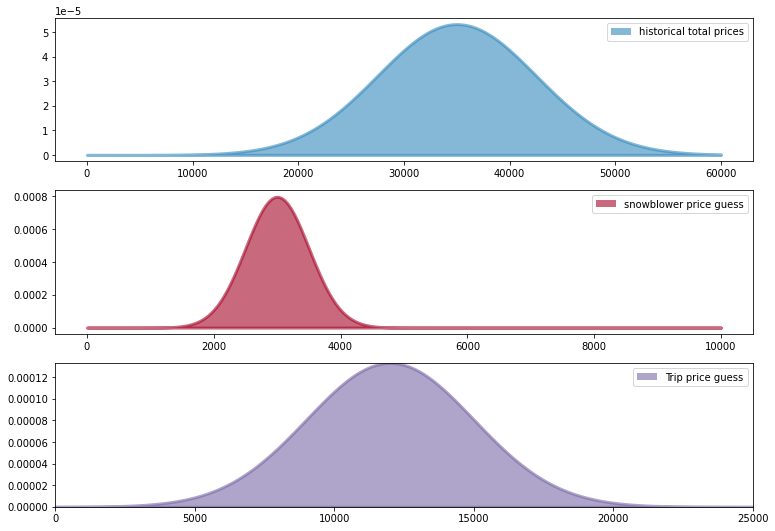

In [2]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt

figsize(12.5, 9)

norm_pdf = stats.norm.pdf

plt.subplot(311)
x = np.linspace(0, 60000, 200)
sp1 = plt.fill_between(x , 0, norm_pdf(x, 35000, 7500), 
                color = "#348ABD", lw = 3, alpha = 0.6,
                label = "historical total prices")
p1 = plt.Rectangle((0, 0), 1, 1, fc=sp1.get_facecolor()[0])
plt.legend([p1], [sp1.get_label()])

plt.subplot(312)
x = np.linspace(0, 10000, 200)
sp2 = plt.fill_between(x , 0, norm_pdf(x, 3000, 500), 
                 color = "#A60628", lw = 3, alpha = 0.6,
                 label="snowblower price guess")

p2 = plt.Rectangle((0, 0), 1, 1, fc=sp2.get_facecolor()[0])
plt.legend([p2], [sp2.get_label()])

plt.subplot(313)
x = np.linspace(0, 25000, 200)
sp3 = plt.fill_between(x , 0, norm_pdf(x, 12000, 3000), 
                 color = "#7A68A6", lw = 3, alpha = 0.6,
                 label = "Trip price guess")
plt.autoscale(tight=True)
p3 = plt.Rectangle((0, 0), 1, 1, fc=sp3.get_facecolor()[0])
plt.legend([p3], [sp3.get_label()]);

In [10]:
import pymc3 as pm

data_mu = [3000, 12000]
data_std =  [500, 3000] 

mu_prior = 35000
std_prior =  7500
with pm.Model() as model:
    true_price = pm.Normal("true_price", mu=mu_prior, sd=std_prior) 
    
    prize_1 = pm.Normal("first_prize", mu=data_mu[0], sd=data_std[0])
    prize_2 = pm.Normal("second_prize", mu=data_mu[1], sd=data_std[1])
    price_estimate = prize_1 + prize_2
    
    logp = pm.Normal.dist(mu=true_price, sd=(3e3)).logp(price_estimate) # 분포정의
    error = pm.Potential("error", logp) # 샘플링 진행, 반드시 필요
    

    
    trace = pm.sample(50000, step=pm.Metropolis())
#    burned_trace = trace[10000:]

price_trace = burned_trace["true_price"]

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [second_prize]
>Metropolis: [first_prize]
>Metropolis: [true_price]


Sampling 4 chains for 1_000 tune and 50_000 draw iterations (4_000 + 200_000 draws total) took 38 seconds.
The number of effective samples is smaller than 10% for some parameters.


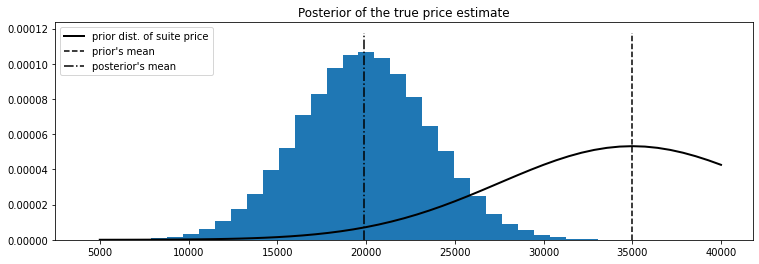

In [11]:
figsize(12.5, 4)

import scipy.stats as stats

x = np.linspace(5000, 40000)
plt.plot(x, stats.norm.pdf(x, 35000, 7500), c = "k", lw = 2, 
         label = "prior dist. of suite price")

_hist = plt.hist(price_trace, bins = 35, density= True, histtype= "stepfilled")
plt.title("Posterior of the true price estimate")
plt.vlines(mu_prior, 0, 1.1*np.max(_hist[0]), label = "prior's mean",
           linestyles="--")
plt.vlines(price_trace.mean(), 0, 1.1*np.max(_hist[0]), \
           label = "posterior's mean", linestyles="-.")
plt.legend(loc = "upper left");

여기에 손실함수를 사용하여 최고의 제시 가격(손실에 따른 **최상의**)을 구한다. 참가자의 손실함수는 다음과 같다고 할 수 있다.

```python

def showcase_loss(guess, true_price, risk=80000):
    if true_price < guess:
        return risk
    elif abs(true_price - guess) <= 250:
        return -2 * np.abs(true_price)
    else:
        return np.abs(true_price - guess - 250)
```

여기서 `risk`는 매개변수로서 우리의 추측이 진짜 가격보다 높을 경우 얼마나 나쁜지를 정의한다. `80000`이란 값은 교재의 저자가 임의로 정한것이다. 

/Users/yeojinchung/.pyenv/versions/teaching_lm/lib/python3.7/site-packages/ipykernel/__main__.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/yeojinchung/.pyenv/versions/teaching_lm/lib/python3.7/site-packages/ipykernel/__main__.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/yeojinchung/.pyenv/versions/teaching_lm/lib/python3.7/site-packages/ipykernel/__main__.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will 

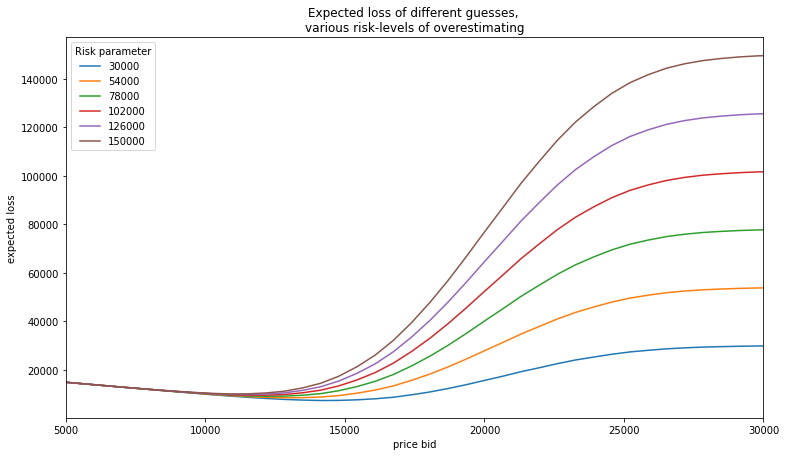

In [12]:
figsize(12.5, 7)

def showdown_loss(guess, true_price, risk = 80000):
        loss = np.zeros_like(true_price)
        ix = true_price < guess
        loss[~ix] = np.abs(guess - true_price[~ix])
        close_mask = [abs(true_price - guess) <= 250]
        loss[close_mask] = -2*true_price[close_mask]
        loss[ix] = risk
        return loss

guesses = np.linspace(5000, 50000, 70) 
risks = np.linspace(30000, 150000, 6)
expected_loss = lambda guess, risk: \
    showdown_loss(guess, price_trace, risk).mean()
        
for _p in risks:
    results = [expected_loss(_g, _p) for _g in guesses]
    plt.plot(guesses, results, label = "%d"%_p)
    
plt.title("Expected loss of different guesses, \nvarious risk-levels of \
overestimating")
plt.legend(loc="upper left", title="Risk parameter")
plt.xlabel("price bid")
plt.ylabel("expected loss")
plt.xlim(5000, 30000);

#### 손실 최소화하기

기대손실을 최소화하는 추정치를 선택하는 것이 좋다. 위의 그림에서 이러한 추정치는 각 곡선의 최저점에 해당한다. 공식으로 보자면 다음 수식에 대한 해를 구하여 기대손실을 최소화 할 수 있다.

$$
\text{arg }\min _{ \hat{\theta} }{ E_{\theta} \left[ L(\theta, \hat{\theta}) \right] } 
$$

기대손실의 최소값을 **베이즈 추정치**(Bayes action)라고 한다. `SciPy`의 [`scipy.optimize.fmin`](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin.html) 함수를 사용하여 단변량 또는 다변량 함수의 최소값을 구할 수 있다.

/Users/yeojinchung/.pyenv/versions/teaching_lm/lib/python3.7/site-packages/ipykernel/__main__.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


minimum at risk 30000: 14473.05
minimum at risk 54000: 13125.07


/Users/yeojinchung/.pyenv/versions/teaching_lm/lib/python3.7/site-packages/ipykernel/__main__.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/yeojinchung/.pyenv/versions/teaching_lm/lib/python3.7/site-packages/ipykernel/__main__.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


minimum at risk 78000: 12438.18
minimum at risk 102000: 11762.06


/Users/yeojinchung/.pyenv/versions/teaching_lm/lib/python3.7/site-packages/ipykernel/__main__.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/yeojinchung/.pyenv/versions/teaching_lm/lib/python3.7/site-packages/ipykernel/__main__.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


minimum at risk 126000: 11570.12
minimum at risk 150000: 10957.19


/Users/yeojinchung/.pyenv/versions/teaching_lm/lib/python3.7/site-packages/ipykernel/__main__.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


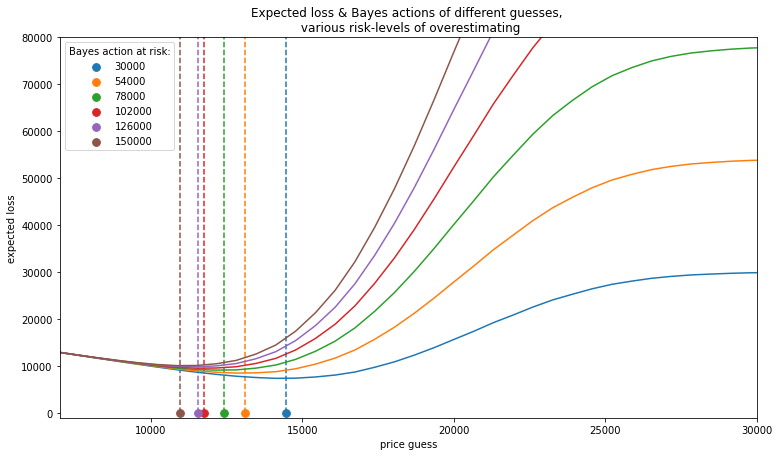

In [13]:
import scipy.optimize as sop

ax = plt.subplot(111)


for _p in risks:
    _color = next(ax._get_lines.prop_cycler)
    _min_results = sop.fmin(expected_loss, 15000, args=(_p,),disp = False)
    _results = [expected_loss(_g, _p) for _g in guesses]
    plt.plot(guesses, _results , color = _color['color'])
    plt.scatter(_min_results, 0, s = 60, \
                color= _color['color'], label = "%d"%_p)
    plt.vlines(_min_results, 0, 120000, color = _color['color'], linestyles="--")
    print("minimum at risk %d: %.2f" % (_p, _min_results))
                                    
plt.title("Expected loss & Bayes actions of different guesses, \n \
various risk-levels of overestimating")
plt.legend(loc="upper left", scatterpoints = 1, title = "Bayes action at risk:")
plt.xlabel("price guess")
plt.ylabel("expected loss")
plt.xlim(7000, 30000)
plt.ylim(-1000, 80000);